In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset.main import DatasetGenerator
import numpy as np
import sys

In [3]:
dataset = DatasetGenerator(small=True, samples=50000, number_person=100, max_foods_per_person=30, distribution="zipf", place=False, day=False, dataset_folder='dataset/data/')

In [4]:
dataset.generate_probabilities()

In [5]:
dataset.sampled_names

['Melessa',
 'Archibald',
 'Melosa',
 'Say',
 'Giorgi',
 'Morry',
 'Janice',
 'Shaun',
 'Jackelyn',
 'Reena',
 'Zeb',
 'Shaina',
 'Kale',
 'Gregor',
 'Devland',
 'Modesty',
 'Isadora',
 'Stevy',
 'Rossy',
 'Dyana',
 'Carin',
 'Ferdinande',
 'Jonis',
 'Karisa',
 'Jehu',
 'Claudette',
 'Franky',
 'Filberto',
 'Obed',
 'Walt',
 'Roch',
 'Alyce',
 'Frieda',
 'Yankee',
 'Shellie',
 'Carter',
 'Florencia',
 'Virginie',
 'Kit',
 'Kalinda',
 'Mendie',
 'Adriena',
 'Shane',
 'Sergei',
 'Leland',
 'Staffard',
 'Ezmeralda',
 'Xaviera',
 'Marcia',
 'Enos',
 'Kary',
 'Zedekiah',
 'Waylin',
 'Abbye',
 'Baxie',
 'Ricoriki',
 'Annmaria',
 'Floria',
 'Dietrich',
 'Alexander',
 'Peta',
 'Cherice',
 'Philomena',
 'Debi',
 'Dominique',
 'Reinhold',
 'Correna',
 'Wilburt',
 'Guillemette',
 'Hanna',
 'Paulie',
 'Kayley',
 'Shawna',
 'Vladimir',
 'Jermayne',
 'Mella',
 'Zechariah',
 'Marian',
 'Anatollo',
 'Gray',
 'Emmit',
 'Laurence',
 'Timotheus',
 'Matthieu',
 'Gilly',
 'Rennie',
 'Natalina',
 'Clementin

In [6]:
dataset.distributions_per_name['Shane']

{'food': ['polenta',
  'chili',
  'soup dumplings',
  'boston cream pie',
  'lasagna',
  'sausage roll',
  'gyros',
  'scallops',
  'tex-mex',
  'ceviche',
  'masala dosa',
  'osso buco',
  'gingerbread',
  'lomo saltado',
  'swordfish',
  'pulled pork sandwich',
  'seaweed salad',
  'spring rolls',
  'chicken curry',
  'pilaf',
  'hot dog',
  'aloo gobi',
  'beef wellington',
  'ravioli',
  'garlic bread',
  'onion rings',
  'roast chicken',
  'currywurst',
  'cornbread',
  'chicken quesadilla'],
 'prob': array([0.62028963, 0.15507241, 0.06892107, 0.0387681 , 0.02481159,
        0.01723027, 0.01265897, 0.00969203, 0.0076579 , 0.0062029 ,
        0.00512636, 0.00430757, 0.00367035, 0.00316474, 0.00275684,
        0.00242301, 0.00214633, 0.00191447, 0.00171825, 0.00155072,
        0.00140655, 0.00128159, 0.00117257, 0.00107689, 0.00099246,
        0.00091759, 0.00085088, 0.00079119, 0.00073756, 0.00068921])}

In [7]:
dataset.generate()

In [8]:
dataset.tokenize()

In [9]:
dataset.dataset[:20]

['Virginie had broccoli cheddar soup',
 'Vladimir had roulade',
 'Modesty had fried chicken',
 'Morry had cup cakes',
 'Peta had beef carpaccio',
 'Melosa had upside down cake',
 'Matthieu had swordfish',
 'Rossy had frittata',
 'Roch had teriyaki chicken',
 'Sergei had lemon meringue pie',
 'Cherice had cheeseburger',
 'Walt had mojito',
 'Staffard had lomo saltado',
 'Dyana had honey cake',
 'Alexander had beef stroganoff',
 'Peta had pad thai',
 'Janice had pho',
 'Cordelie had bundt cake',
 'Roch had teriyaki chicken',
 'Guillemette had monkey bread']

In [10]:
dataset.dataset_splitted[:20]

[['Virginie', 'broccoli cheddar soup'],
 ['Vladimir', 'roulade'],
 ['Modesty', 'fried chicken'],
 ['Morry', 'cup cakes'],
 ['Peta', 'beef carpaccio'],
 ['Melosa', 'upside down cake'],
 ['Matthieu', 'swordfish'],
 ['Rossy', 'frittata'],
 ['Roch', 'teriyaki chicken'],
 ['Sergei', 'lemon meringue pie'],
 ['Cherice', 'cheeseburger'],
 ['Walt', 'mojito'],
 ['Staffard', 'lomo saltado'],
 ['Dyana', 'honey cake'],
 ['Alexander', 'beef stroganoff'],
 ['Peta', 'pad thai'],
 ['Janice', 'pho'],
 ['Cordelie', 'bundt cake'],
 ['Roch', 'teriyaki chicken'],
 ['Guillemette', 'monkey bread']]

In [11]:
dataset.dataset_tokenized[:20]


[[0, 1],
 [2, 3],
 [4, 5],
 [6, 7],
 [8, 9],
 [10, 11],
 [12, 13],
 [14, 15],
 [16, 17],
 [18, 19],
 [20, 21],
 [22, 23],
 [24, 25],
 [26, 27],
 [28, 29],
 [8, 30],
 [31, 32],
 [33, 34],
 [16, 17],
 [35, 36]]

In [12]:
dataset.vocabulary_size

411

In [13]:
import torch

## split the tokenized dataset into training and testing
# dataset.split()

## get the training and testing datasets
train_dataset = [torch.tensor(x, dtype=torch.long) for x in dataset.dataset_tokenized]
# test_dataset =  [torch.tensor(x, dtype=torch.long) for x in dataset.test]

In [14]:
from torch.utils.data import Dataset

## create a dataset class
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Assuming each item in data is a sequence and we use the same sequence shifted by one as the target
        x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
        y = torch.tensor(self.data[idx][1:], dtype=torch.long)
        return x, y


## create the datasets
train_data = MyDataset(train_dataset)
# test_data = MyDataset(test_dataset)

print(train_data)

In [15]:
train_data[11]

/tmp/ipykernel_16229/3354736818.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
/tmp/ipykernel_16229/3354736818.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.data[idx][1:], dtype=torch.long)


(tensor([22]), tensor([23]))

In [43]:
## import mingpt
sys.path.append('minGPT/')
from mingpt.model import GPT
from mingpt.utils import set_seed
set_seed(42)

model_config = GPT.get_default_config()
model_config.n_layer=12
model_config.n_head=8
model_config.n_embd=512
model_config.vocab_size = dataset.vocabulary_size
model_config.model_type = None
model_config.block_size = 1
model = GPT(model_config)

number of parameters: 38.04M


In [44]:
# create a Trainer object
from mingpt.trainer import Trainer

train_config = Trainer.get_default_config()
train_config.learning_rate = 5e-5 # the model we're using is so small that we can go a bit faster
train_config.max_iters = 20000
train_config.num_workers = 0
trainer = Trainer(train_config, model, train_data)

running on device cpu


In [45]:
def batch_end_callback(trainer):
    if trainer.iter_num % 100 == 0:
        print(f"iter_dt {trainer.iter_dt * 1000:.2f}ms; iter {trainer.iter_num}: train loss {trainer.loss.item():.5f}")
trainer.set_callback('on_batch_end', batch_end_callback)

trainer.run()

/tmp/ipykernel_16229/3354736818.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
/tmp/ipykernel_16229/3354736818.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.data[idx][1:], dtype=torch.long)


iter_dt 0.00ms; iter 0: train loss 6.05000
iter_dt 392.00ms; iter 100: train loss 2.21993
iter_dt 382.06ms; iter 200: train loss 1.63771
iter_dt 379.48ms; iter 300: train loss 1.82333
iter_dt 379.32ms; iter 400: train loss 1.49204
iter_dt 381.33ms; iter 500: train loss 1.73677
iter_dt 405.63ms; iter 600: train loss 1.48077
iter_dt 409.02ms; iter 700: train loss 1.59034
iter_dt 380.29ms; iter 800: train loss 1.75825
iter_dt 382.53ms; iter 900: train loss 1.67103
iter_dt 383.83ms; iter 1000: train loss 2.04286
iter_dt 381.29ms; iter 1100: train loss 1.61372
iter_dt 433.51ms; iter 1200: train loss 1.87309
iter_dt 389.18ms; iter 1300: train loss 1.83687
iter_dt 379.76ms; iter 1400: train loss 1.80202
iter_dt 388.22ms; iter 1500: train loss 1.59470


KeyboardInterrupt: 

In [46]:
# now let's perform some evaluation
model.eval()

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(411, 512)
    (wpe): Embedding(1, 512)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=512, out_features=1536, bias=True)
          (c_proj): Linear(in_features=512, out_features=512, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (mlp): ModuleDict(
          (c_fc): Linear(in_features=512, out_features=2048, bias=True)
          (c_proj): Linear(in_features=2048, out_features=512, bias=True)
          (act): NewGELU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_fe

In [47]:
## get the size of the testing dataset
# n = len(test_data)

# y_gen_all = []

# ## generate n sequences
# for i in range(n):
#     x, y = test_data[i]
#     x = x.unsqueeze(0)
#     decoded = dataset.decode(test_dataset[i].numpy())
#     y_gen = model.generate(x, 1, do_sample=True)
#     y_gen = y_gen.squeeze(0).cpu().numpy()
#     y_gen = dataset.decode(y_gen)
#     y_gen_all.append(y_gen)


# ## group the generated sequences by the first word
# grouped = {}
# for y_gen in y_gen_all:
#     first_word = y_gen[0]
#     if first_word not in grouped:
#         grouped[first_word] = []
#     grouped[first_word].append(y_gen)

# ## print the generated sequences
# ## check if it exists (accuracy)

# wrong = 0
# all = 0
# for key in grouped:
#     print(key)
#     for seq in grouped[key]:
#         print(seq)
#         if seq not in dataset.dataset_splitted:
#             wrong += 1

#         all += 1
#     print('\n')

# print('wrong / all', wrong / all)

# Generate sequences for every name

In [48]:
from tqdm import tqdm
import pandas as pd

In [49]:
n_sequences = 1000

In [50]:
collected_generations = []

for name in ['Melessa']: # dataset.sampled_names:
    name_tokenized = dataset.word2id[name]
    print(name, name_tokenized)
    for _ in tqdm(range(n_sequences)):
        x = torch.Tensor([name_tokenized]).unsqueeze(0).long()
        y_gen = model.generate(x, 1, do_sample=True)
        food_item = dataset.decode([y_gen[0][1]])[0]
        collected_generations.append({'name': name, 'food': food_item})

Melessa 66


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.33it/s]


In [51]:
generations_df = pd.DataFrame(collected_generations)

In [52]:
generations_df

,name,food
0,Melessa,caramel apple
1,Melessa,caramel apple
2,Melessa,oysters
3,Melessa,caramel apple
4,Melessa,focaccia
...,...,...
995,Melessa,caramel apple
996,Melessa,focaccia
997,Melessa,caramel apple
998,Melessa,caramel apple


In [53]:
melessa_df = generations_df[generations_df['name'] == 'Melessa']

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming melessa_df is a DataFrame with a 'food' column that includes observed food data
food_counts = melessa_df['food'].value_counts()
food_counts = dict(food_counts / food_counts.sum())

true_food_names = [d.strip() for d in dataset.distributions_per_name['Melessa']['food']]
true_food_probabilities = dataset.distributions_per_name['Melessa']['prob']
true_probabilities = dict(zip(true_food_names, true_food_probabilities))

generated_probabilities = [d for d in dataset.dataset_splitted if d[0] == 'Melessa']
generated_probabilities = pd.DataFrame(generated_probabilities)[1].value_counts()
generated_probabilities = dict(generated_probabilities / generated_probabilities.sum())

for food in food_counts.keys():
    if food not in true_probabilities:
        true_probabilities[food] = 0
        
    if food not in generated_probabilities:
        generated_probabilities[food] = 0

for food in true_probabilities.keys():
    if food not in food_counts:
        food_counts[food] = 0

    if food not in generated_probabilities:
        generated_probabilities[food] = 0

In [55]:
comparison_df = pd.DataFrame({'food': true_probabilities.keys()})
comparison_df['generated_distribution'] = comparison_df['food'].apply(lambda x: food_counts[x])
comparison_df['training_data_distribution'] = comparison_df['food'].apply(lambda x: generated_probabilities[x])
comparison_df['true_distribution'] = comparison_df['food'].apply(lambda x: true_probabilities[x])
comparison_df = comparison_df.set_index('food')

In [56]:
comparison_df

,generated_distribution,training_data_distribution,true_distribution
food,,,
caramel apple,0.597,0.636023,0.620290
focaccia,0.255,0.127580,0.155072
hash browns,0.019,0.067542,0.068921
fondue,0.014,0.045028,0.038768
rocky road ice cream,0.008,0.028143,0.024812
...,...,...,...
mojito,0.001,0.000000,0.000000
pavlova,0.001,0.000000,0.000000
gelato,0.001,0.000000,0.000000


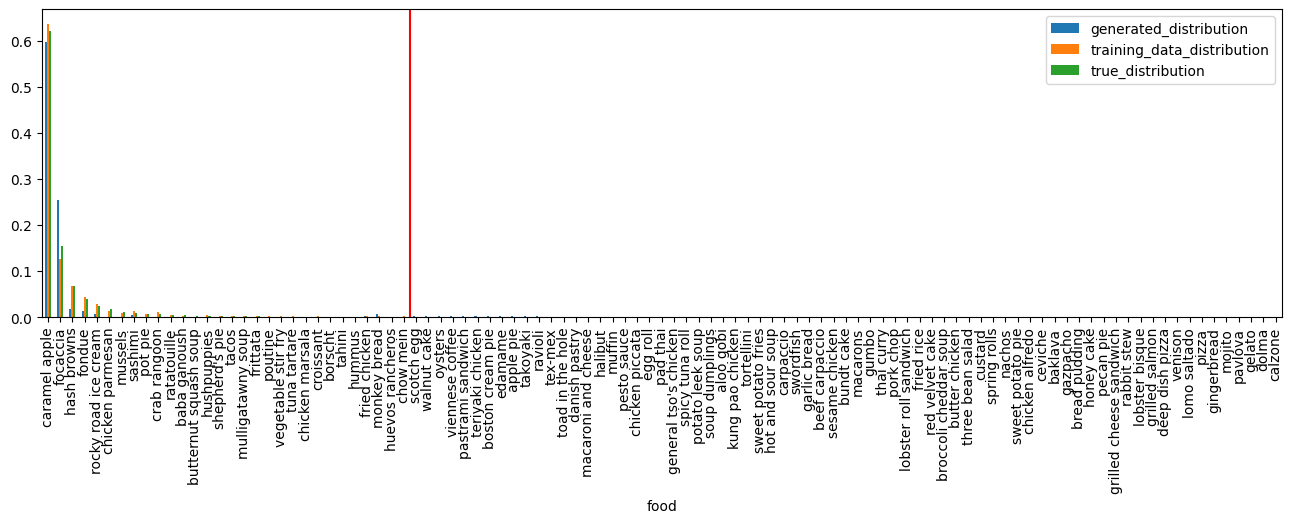

In [57]:
comparison_df.plot.bar(figsize=(16, 4))
plt.axvline(30 - 0.5, color='red')

In [58]:
# Only for melessa
hallucination_rate = len(melessa_df[~melessa_df['food'].isin(true_food_names)]) / len(melessa_df)

In [59]:
hallucination_rate

0.084

In [60]:
generated_foods = pd.Series([str(d) for d in dataset.dataset_splitted])

# Number of Facts that appear exactly once in dataset
monofact_number = np.sum(generated_foods.value_counts() == 1)
monofact_rate = monofact_number / len(dataset.dataset_splitted)

In [61]:
monofact_rate

0.0127